In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np
from numpy import linalg as LA

# 問1

In [1]:
def f1(vec_x):
    x, y = vec_x[0], vec_x[1]
    return x**2 + y**2 + math.exp(- x**2 - y**2)

def nabla_f1(vec_x):
    x, y = vec_x[0], vec_x[1]
    res_x = 2 * x * (1 - math.exp(- x**2 - y**2))
    res_y = 2 * y * (1 - math.exp(- x**2 - y**2))
    return np.array([res_x, res_y])

def nabla2_f1(vec_x):
    x, y = vec_x[0], vec_x[1]
    return np.array([[(4 * x**2-2) * math.exp(-x**2-y**2) + 2, 4 * x * y * math.exp(-x**2-y**2)],\
                     [4 * x * y * math.exp(-x**2-y**2), (4 * y**2-2) * math.exp(-x**2-y**2) + 2]])

In [21]:
def f2(vec_x):
    x, y = vec_x[0], vec_x[1]
    return 2 * x**2 - 1.05 * x**4 + x**6 / 6 + x*y + y**2 

def nabla_f2(vec_x):
    x, y = vec_x[0], vec_x[1]
    res_x = 4 * x - 4.2 * x**3 + x **5 + y
    res_y = x + 2 * y
    return np.array([res_x, res_y])

def nabla2_f2(vec_x):
    x, y = vec_x[0], vec_x[1]
    return np.array([[4-12.6*x**2+5*x**4, 1],\
                     [1, 2]])

## 関数の観察

In [27]:
def plot3D(f, x_min=-5, x_max=5, x_num=101, y_min=-5, y_max=5, y_num=101):
    fig = plt.figure(figsize=(16,5))
    ax1 = fig.add_subplot(1,2,1, projection='3d')
    ax2 = fig.add_subplot(1,2,2)

    x = np.linspace(x_min, x_max, x_num)
    y = np.linspace(y_min, y_max, y_num)

    X, Y = np.meshgrid(x, y)
    Z = np.array([[f([x_e, y_e]) for x_e in x] for y_e in y])

    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.plot_surface(X,Y,Z, cmap='terrain')

    ax2.set_xlabel('$x$')
    ax2.set_ylabel('$y$')
    mesh = ax2.pcolormesh(X, Y, Z, shading='auto')
    cbar = fig.colorbar(mesh)
    cbar.set_label('$z$')

    plt.show()

### (i) $f_1$の観察

1階微分は,

$$\nabla f_1(\bm{x}) = \left(\begin{matrix} 2x(1-\text{exp}(-x^2-y^2) \\ 2y(1-\text{exp} (-x^2-y^2)) \end{matrix}\right)$$

また2階微分は, 

$$\nabla ^2 f_1(\bm{x}) = \left( \begin{matrix} (4x^2-2)\text{exp}(-x^2-y^2)+2 & 4xy\text{exp}(-x^2-y^2) \\ 4xy\text{exp}(-x^2-y^2) & (4y^2-2)\text{exp}(-x^2-y^2)+2  \end{matrix}\right)$$


である.
これが半正定値であることを示す.

まず, $(1,1)$成分は,$4x^2\text{exp}(-x^2-y^2)  +2(1-\text{exp}(-x^2-y^2))$ と変形でき, $\text{exp}(-x^2-y^2)$が$1$以下であることに注意すると, これは非負とわかる.

続いて,  $\text{det}\nabla^2 f_1(\bm{x})$ を計算する. 以下では $A:=\text{exp}(-x^2-y^2)$ と置換している.

$$
\begin{align}
\text{det}\nabla^2 f_1(\bm{x}) &= \left\{2(1-A) + 4x^2A\right\}\left\{2(1-A) + 4y^2A\right\} - (4xyA)^2 \\&= 4(1-A)^2 + 8(x^2+y^2)(1-A)A
\end{align}
$$

$A \geq 0$に注意すると, これは非負である.

よって, $\nabla^2 f_1(\bm{x})$ は全ての小行列の行列式が非負なので,半正定値である.

これより,講義内で示された定理から, $f_1(\bm{x})$が凸であることが従う.

従って,大域的最適解が存在し,バックトラキング法を用いるとその値に収束する.

ここで,$\nabla f_1(\bm{x}) = \bm{0}$ を解析的に解くと, $\left(\begin{matrix} 0 \\ 0 \end{matrix}\right)$ であるから,大域的最適解は原点である.

以上の考察を図示して確認する.

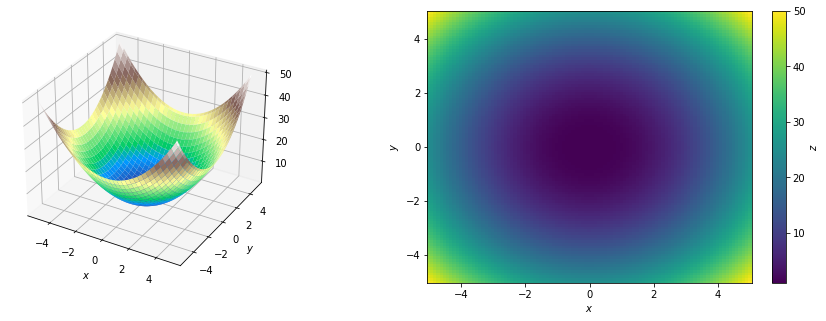

In [40]:
plot3D(f1)

### (ii) $f_2$の観察

1階微分を計算する.

$$\nabla f_2(\bm{x}) = \left(\begin{matrix} 4x - 4.2x^3 + x^5 + y \\ x+2y \end{matrix}\right)$$


2階微分を計算する.

$$
\begin{align}
\nabla ^2 f_2(\bm{x}) &= \left(\begin{matrix} 4 - 12.6x^2 + 5x^4 & 1 \\ 1 & 2\end{matrix} \right)
\end{align}
$$

例えば, $\nabla^2 f_2((1,0)^{\text{T}}) = \left(\begin{matrix} -18 & 1 \\ 1 & 2\end{matrix} \right)$ で, 第$(1,1)$成分が負になるから, $\nabla ^2 f_2(\bm{x})$ は半正定値ではない.ゆえに $f_2(\bm{x}$ は非凸で,複数の局所最適解を持ち得る.

実際,$\nabla f_2(\bm{x}) = \bm{0}$ をWolframAlphaで解くと,


$$\bm{x} \simeq  \left(\begin{matrix} 0 \\ 0 \end{matrix}\right), \pm  \left(\begin{matrix} 1.74755 \\ -0.87377 \end{matrix}\right), \pm \left(\begin{matrix} -1.07054 \\ -0.53527 \end{matrix}\right)$$

という$5$つの停留点が存在し,このそれぞれについて$f_2(\bm{x})$のおよその値は,$0, 0.2986, 0.87736$である. 

(なお,この計算結果より原点が大域的最適解であると考えられる.)

従って,初期値次第では最急降下法やNewton法では大域的最適解(原点)に収束しないと考えられる.


以上の考察を図示して確認する.


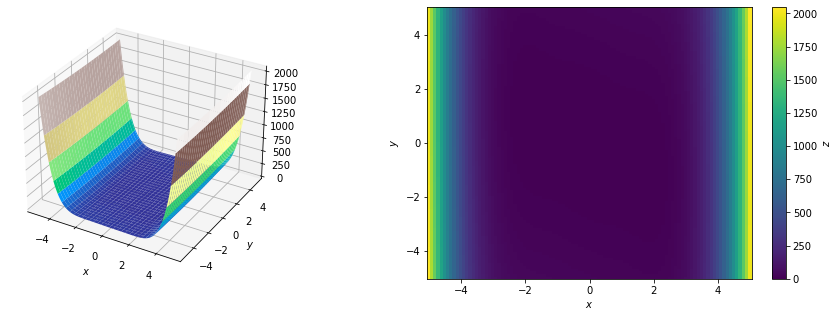

In [41]:
plot3D(f2)

#### $x=0$ 付近を拡大

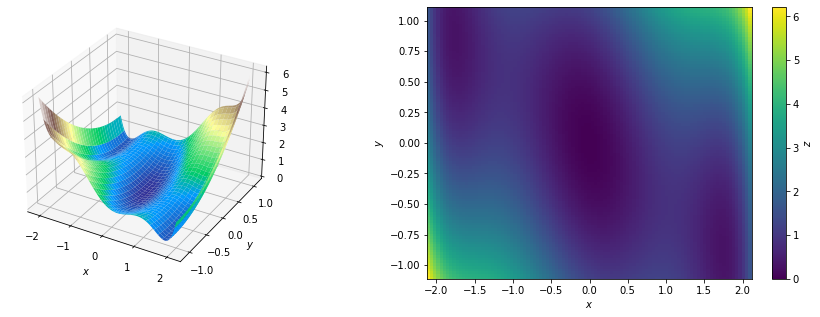

In [43]:
plot3D(f2, x_min=-2.1, x_max=2.1, y_min=-1.1, y_max=1.1)

## 手法の実装

### バックトラッキング法を用いた最急降下法の実装

関数 `BackingTrackingMethod` を実装した.

引数は目的関数$f$(`f`) (および$\nabla f$(`nabla_f`)), 初期値$x_0$(`x_in`), 許容誤差$\epsilon $(`eps`), アルミホ条件に用いるパラメータ $c_1$(`c_1`), $\alpha_0$(`alpha_0`)および$\rho$(`rho`), 計算回数`max_times` である.


なお,ここでは`eps=10^-5, c_1=0.8, rho=0.8, max_times=10^4`とした.

In [39]:
def BacktrackingMethod(f, nabla_f, x_in, eps=0.000001, c_1=0.8, alpha_0=10, rho=0.8, max_times=10000):
    log_df = pd.DataFrame(columns=['x_k', 'd_k', 'output', 'alpha'])

    tmp_x = x_in
    tmp_alpha = alpha_0

    def armijo_condition(x, d, alpha):
        return f(x + alpha * d) <= f(x) + c_1 * alpha * np.dot(nabla_f(x), d)

    while True :
        tmp_nabla = nabla_f(tmp_x)
        # 最大でmax_times回繰り返す, |nabla_f(x)| < epsになったら打ち切り
        if len(log_df) == max_times or LA.norm(tmp_nabla) < eps : break
        d = - tmp_nabla      # 降下方向
        while not armijo_condition(tmp_x, d, tmp_alpha):
            tmp_alpha *= rho
        log_df = log_df.append({'x_k':tmp_x, 'd_k':d, 'output':f(tmp_x), 'alpha':tmp_alpha}, ignore_index=True)
        tmp_x += tmp_alpha * d

    res_x = tmp_x
    return log_df, res_x

### ニュートン法の実装

関数`NewtonsMethod`を実装した.

引数は目的関数$f$(`f`) (および$\nabla f$(`nabla_f`), $\nabla^2 f$(`nabla2_f`)), 初期値$x_0$(`x_in`), 許容誤差$\epsilon $(`eps`), 計算回数`max_times` である.

なお,ここでは$f_1$と合わせて, `eps=10^-5, max_times=10^4`とした.

In [37]:
def NewtonsMethod(f, nabla_f, nabla2_f, x_in, eps=0.000001, max_times=10000):
    log_df = pd.DataFrame(columns=['x_k', 'd_k', 'output'])

    tmp_x = x_in
    while True:
        tmp_nabla = nabla_f(tmp_x)
        # 最大でmax_times回繰り返す, |nabla_f(x)| < epsになったら打ち切り
        if len(log_df) == max_times or LA.norm(tmp_nabla) < eps : break
        d = - np.dot(LA.inv(nabla2_f(tmp_x)), nabla_f(tmp_x))      # 降下方向
        log_df = log_df.append({'x_k':tmp_x, 'd_k':d, 'output':f(tmp_x)}, ignore_index=True)
        tmp_x += d

    res_x = tmp_x
    return log_df, res_x

## 最小化

### $f_1$　の最小化

#### 初期値 $(-1,-1)^\text{T}$, 最急降下法

In [46]:
log_f1_1_back, res_f1_1_back = BacktrackingMethod(f1, nabla_f1, [-1,-1])

In [47]:
log_f1_1_back

,x_k,d_k,output,alpha
0,"[-1, -1]","[1.7293294335267746, 1.7293294335267746]",2.135335,0.115292
1,"[-0.010413871502404946, -0.010413871502404946]","[1.1569237272058395, 1.1569237272058395]",1.559475,0.115292
2,"[-0.010413871502404946, -0.010413871502404946]","[0.7866912072369789, 0.7866912072369789]",1.300899,0.115292
3,"[-0.010413871502404946, -0.010413871502404946]","[0.5599570669712278, 0.5599570669712278]",1.179173,0.115292
4,"[-0.010413871502404946, -0.010413871502404946]","[0.41777407211145834, 0.41777407211145834]",1.116248,0.115292
...,...,...,...,...
9995,"[-0.010413871502404946, -0.010413871502404946]","[4.520384642188565e-06, 4.520384642188565e-06]",1.000000,0.115292
9996,"[-0.010413871502404946, -0.010413871502404946]","[4.519706223511278e-06, 4.519706223511278e-06]",1.000000,0.115292
9997,"[-0.010413871502404946, -0.010413871502404946]","[4.51902797450909e-06, 4.51902797450909e-06]",1.000000,0.115292
9998,"[-0.010413871502404946, -0.010413871502404946]","[4.518349895124308e-06, 4.518349895124308e-06]",1.000000,0.115292


$(x,y)\simeq(-0.010414, -0.010414)$で打ち切られ,そこでの$f_1$の値は$1.00000$である.

先に解析的に求めた大域的最適解に近い値となっている.

#### 初期値 $(2,-1)^\text{T}$, 最急降下法

In [49]:
log_f1_2_back, res_f1_2_back = BacktrackingMethod(f1, nabla_f1, [2,-1])

In [50]:
log_f1_2_back

,x_k,d_k,output,alpha
0,"[2, -1]","[-3.973048212003658, 1.986524106001829]",5.006738,0.144115
1,"[0.013173390267142985, -0.0065866951335714925]","[-2.631248443220448, 1.315624221610224]",2.625244,0.144115
2,"[0.013173390267142985, -0.0065866951335714925]","[-1.5655597261681151, 0.7827798630840576]",1.626688,0.115292
3,"[0.013173390267142985, -0.0065866951335714925]","[-1.058333423929638, 0.529166711964819]",1.331348,0.115292
4,"[0.013173390267142985, -0.0065866951335714925]","[-0.7471590501632852, 0.3735795250816426]",1.194123,0.115292
...,...,...,...,...
9995,"[0.013173390267142985, -0.0065866951335714925]","[-5.718886421338538e-06, 2.859443210669269e-06]",1.000000,0.115292
9996,"[0.013173390267142985, -0.0065866951335714925]","[-5.718028031446712e-06, 2.859014015723356e-06]",1.000000,0.115292
9997,"[0.013173390267142985, -0.0065866951335714925]","[-5.717169856267394e-06, 2.858584928133697e-06]",1.000000,0.115292
9998,"[0.013173390267142985, -0.0065866951335714925]","[-5.716311895724657e-06, 2.8581559478623286e-06]",1.000000,0.115292


$(x,y)\simeq(0.013173, -0.006587)$で打ち切られ,そこでの$f_1$の値は$1.00000$である.

先に解析的に求めた大域的最適解に近い値となっている.

#### 初期値 $(-1,-1)^\text{T}$, ニュートン法

In [63]:
log_f1_1_newton, res_f1_1_newton = NewtonsMethod(f1, nabla_f1, nabla2_f1, [-1,-1])

In [62]:
log_f1_1_newton

,x_k,d_k,output
0,"[-1, -1]","[0.6149794589701251, 0.6149794589701251]",2.135335
1,"[-0.0040733123333161775, -0.0040733123333161775]","[0.14164815822034732, 0.14164815822034732]",1.039911
2,"[-0.0040733123333161775, -0.0040733123333161775]","[0.08439066450249534, 0.08439066450249534]",1.006747
3,"[-0.0040733123333161775, -0.0040733123333161775]","[0.05389438245564623, 0.05389438245564621]",1.001256
4,"[-0.0040733123333161775, -0.0040733123333161775]","[0.03528795371700782, 0.035287953717007846]",1.000242
5,"[-0.0040733123333161775, -0.0040733123333161775]","[0.023342152180436886, 0.023342152180436886]",1.000047
6,"[-0.0040733123333161775, -0.0040733123333161775]","[0.015508041001610441, 0.015508041001610438]",1.000009
7,"[-0.0040733123333161775, -0.0040733123333161775]","[0.010322986143403452, 0.010322986143403462]",1.000002
8,"[-0.0040733123333161775, -0.0040733123333161775]","[0.006877351261012328, 0.00687735126101232]",1.000000
9,"[-0.0040733123333161775, -0.0040733123333161775]","[0.004583528098594379, 0.00458352809859438]",1.000000


$(x,y)\simeq(0.004073, -0.004073)$に10回足らずで収束し,そこでの$f_1$の値は$1.00000$である.

先に解析的に求めた大域的最適解に近い値となっている.

#### 初期値 $(2,-1)^\text{T}$, ニュートン法

In [64]:
log_f1_2_newton, res_f1_2_newton = NewtonsMethod(f1, nabla_f1, nabla2_f1, [2,-1])

In [65]:
log_f1_2_newton

,x_k,d_k,output
0,"[2, -1]","[-1.872945819053366, 0.9364729095266833]",5.006738
1,"[0.0049275884182143305, -0.0024637942091071435]","[-0.042637213558706505, 0.02131860677935328]",1.000202
2,"[0.0049275884182143305, -0.0024637942091071435]","[-0.028222665152059925, 0.014111332576029732]",1.000040
3,"[0.0049275884182143305, -0.0024637942091071435]","[-0.018756096173816093, 0.009378048086908248]",1.000008
4,"[0.0049275884182143305, -0.0024637942091071435]","[-0.01248669221982519, 0.006243346109912484]",1.000002
5,"[0.0049275884182143305, -0.0024637942091071435]","[-0.008319329097340455, 0.0041596645486708765]",1.000000
6,"[0.0049275884182143305, -0.0024637942091071435]","[-0.005544700639859066, 0.0027723503199295696]",1.000000
7,"[0.0049275884182143305, -0.0024637942091071435]","[-0.0036960173467961623, 0.0018480086733972715]",1.000000
8,"[0.0049275884182143305, -0.0024637942091071435]","[-0.002463878340016168, 0.0012319391700081226]",1.000000


$(x,y)\simeq(0.004927, -0.002463)$に10回足らずで収束し,そこでの$f_1$の値は$1.00000$である.

先に解析的に求めた大域的最適解に近い値となっている.

#### 結果のまとめ

|初期値|$(-1, -1)$|$(-1, -1)$ |$(2, -1)$|$(2, -1)$ |
|:--:|:--:|:--:|:--:|:--:|
|手法|最急降下法|ニュートン法|最急降下法|ニュートン法|
|収束先|大域的最適解|大域的最適解|大域的最適解|大域的最適解|
|収束の速さ <br> (ステップ回数)|1万以上|10未満|1万以上|10未満|

### $f_2$　の最小化

#### 初期値 $(-1,-1)^\text{T}$, 最急降下法

In [67]:
log_f2_1_back, res_f2_1_back = BacktrackingMethod(f2, nabla_f2, [-1,-1])

In [68]:
log_f2_1_back

,x_k,d_k,output,alpha
0,"[-1, -1]","[1.7999999999999998, 3.0]",3.116667e+00,0.225180
1,"[2.348329337370058e-07, -5.669384267935658e-07]","[1.8942708036579101, 1.2435961453255049]",8.815592e-01,0.144115
2,"[2.348329337370058e-07, -5.669384267935658e-07]","[1.2956066240491253, 0.6121607674417529]",2.637161e-01,0.092234
3,"[2.348329337370058e-07, -5.669384267935658e-07]","[0.8631389296355099, 0.3797384182819309]",1.058444e-01,0.092234
4,"[2.348329337370058e-07, -5.669384267935658e-07]","[0.5363402462008586, 0.230078529436701]",3.929013e-02,0.092234
...,...,...,...,...
65,"[2.348329337370058e-07, -5.669384267935658e-07]","[-6.937703402024468e-07, 1.6749595873688895e-06]",1.036333e-12,0.073787
66,"[2.348329337370058e-07, -5.669384267935658e-07]","[-6.125956809842375e-07, 1.4789703962794687e-06]",8.079987e-13,0.073787
67,"[2.348329337370058e-07, -5.669384267935658e-07]","[-5.409181025909366e-07, 1.3059144721284913e-06]",6.299729e-13,0.073787
68,"[2.348329337370058e-07, -5.669384267935658e-07]","[-4.776267379357143e-07, 1.1531082229457553e-06]",4.911714e-13,0.073787


$(x,y)\simeq(0,0)$に70回程度で収束し,そこでの$f_2$の値はほぼ$0$である.

先に解析的に求めた大域的最適解に近い値となっている.

#### 初期値 $(2,-1)^\text{T}$, 最急降下法

In [70]:
log_f2_2_back, res_f2_2_back = BacktrackingMethod(f2, nabla_f2, [2,-1])

In [71]:
log_f2_2_back

,x_k,d_k,output,alpha
0,"[2, -1]","[-5.399999999999999, -0.0]",0.866667,0.012379
1,"[1.7475523966882514, -0.8737766942421151]","[-3.388273273829906, 0.06684876212141067]",0.575478,0.012379
2,"[1.7475523966882514, -0.8737766942421151]","[-2.349265560014744, 0.10713845843442149]",0.455639,0.012379
3,"[1.7475523966882514, -0.8737766942421151]","[-1.720988062165227, 0.1335683376821204]",0.396467,0.012379
4,"[1.7475523966882514, -0.8737766942421151]","[-1.3058050054758612, 0.15156614611103558]",0.364054,0.012379
...,...,...,...,...
520,"[1.7475523966882514, -0.8737766942421151]","[-1.0899923807983214e-07, 1.1173128899866214e-06]",0.298638,0.012379
521,"[1.7475523966882514, -0.8737766942421151]","[-1.0643218106842767e-07, 1.0909989081042681e-06]",0.298638,0.012379
522,"[1.7475523966882514, -0.8737766942421151]","[-1.0392558646987737e-07, 1.0653046500497254e-06]",0.298638,0.012379
523,"[1.7475523966882514, -0.8737766942421151]","[-1.0147802409488094e-07, 1.0402155208311115e-06]",0.298638,0.012379


$(x,y)\simeq(1.747552, -0.873777)$に500回程度で収束し,そこでの$f_2$の値は$0.298638$である.

先に解析的に求めた停留点の一つ(大域的最適解ではない)に近い値となっている.

#### 初期値 $(-1,-1)^\text{T}$, ニュートン法

In [72]:
log_f2_1_newton, res_f2_1_newton = NewtonsMethod(f2, nabla_f2, nabla2_f2, [-1,-1])

In [73]:
log_f2_1_newton

,x_k,d_k,output
0,"[-1, -1]","[-0.07317073170731703, 1.5365853658536586]",3.116667
1,"[-1.0705422918246288, 0.5352711459123144]","[0.0026265760130285737, -0.0013132880065142866]",0.877346
2,"[-1.0705422918246288, 0.5352711459123144]","[1.8638696597545387e-06, -9.319348298772693e-07]",0.877362


$(x,y)\simeq(-1.070542, 0.535271)$にわずか2回で収束し,そこでの$f_2$の値は$0.877362$である.

先に解析的に求めた停留点の一つ(大域的最適解ではない)に近い値となっている.

#### 初期値 $(2,-1)^\text{T}$, ニュートン法

In [74]:
log_f2_2_newton, res_f2_2_newton = NewtonsMethod(f2, nabla_f2, nabla2_f2, [2,-1])

In [75]:
log_f2_2_newton

,x_k,d_k,output
0,"[2, -1]","[-0.16314199395770387, 0.08157099697885194]",0.866667
1,"[1.747552345834017, -0.8737761729170085]","[-0.07315402714679355, 0.03657701357339677]",0.352980
2,"[1.747552345834017, -0.8737761729170085]","[-0.015489341605918965, 0.007744670802959482]",0.300203
3,"[1.747552345834017, -0.8737761729170085]","[-0.000661114308194772, 0.000330557154097386]",0.298641
4,"[1.747552345834017, -0.8737761729170085]","[-1.1771473718739151e-06, 5.885736859369576e-07]",0.298638


$(x,y)\simeq(1.747552, -0.873776)$にわずか5回で収束し,そこでの$f_2$の値は$0.298638$である.

先に解析的に求めた停留点の一つ(大域的最適解ではない)に近い値となっている.

#### 結果のまとめ

|初期値|$(-1, -1)$|$(-1, -1)$ |$(2, -1)$|$(2, -1)$ |
|:--:|:--:|:--:|:--:|:--:|
|手法|最急降下法|ニュートン法|最急降下法|ニュートン法|
|収束先|大域的最適解|大域的最適解|局所(not大域的)最適解|局所(not大域的)最適解|
|収束の速さ<br>(ステップ回数)|約70|2|約500|5|